In [166]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [167]:
# Checando o diretorio de imagens   
data_dir = "imagem/"
data_dir = pathlib.Path(data_dir) 
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [168]:
# parâmetros para o carregador:
batch_size = 32
img_height = 180
img_width = 180 

In [169]:
# Validação de dados de treino
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 526 files belonging to 6 classes.
Using 421 files for training.


In [170]:
# Validação de dados 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 526 files belonging to 6 classes.
Using 105 files for validation.


In [171]:
class_names = train_ds.class_names
print(class_names)

['CNH_ABERTA', 'CNH_Fechado', 'Identidade Dois LAdos', 'Identidade_LadoFoto', 'Identidade_dados', 'temp']


In [172]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) 

In [173]:
#Alterar aqui

In [174]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [175]:
# Criar modelo
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [176]:
# Compilar o modelo  
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [177]:
# Treinar o modelo 
epochs = 15
history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/15
14/14 [==============================] - 11s 666ms/step - loss: 1.9928 - accuracy: 0.1762 - val_loss: 1.6039 - val_accuracy: 0.1524
Epoch 2/15
14/14 [==============================] - 10s 660ms/step - loss: 1.5893 - accuracy: 0.2625 - val_loss: 1.4526 - val_accuracy: 0.3238
Epoch 3/15
14/14 [==============================] - 10s 656ms/step - loss: 1.4047 - accuracy: 0.4807 - val_loss: 1.2980 - val_accuracy: 0.5048
Epoch 4/15
14/14 [==============================] - 10s 650ms/step - loss: 1.2371 - accuracy: 0.5299 - val_loss: 1.1009 - val_accuracy: 0.7143
Epoch 5/15
14/14 [==============================] - 10s 656ms/step - loss: 1.0242 - accuracy: 0.6370 - val_loss: 0.9304 - val_accuracy: 0.6952
Epoch 6/15
14/14 [==============================] - 10s 660ms/step - loss: 0.9122 - accuracy: 0.6699 - val_loss: 0.8763 - val_accuracy: 0.7429
Epoch 7/15
14/14 [==============================] - 10s 661ms/step - loss: 0.8368 - accuracy: 0.7281 - val_loss: 1.2973 - val_accuracy: 0.5905

In [185]:
# Salvaro modelo  
model.save("modeloImagens.h5")

Text(0.5, 1.0, 'Training and Validation Loss')

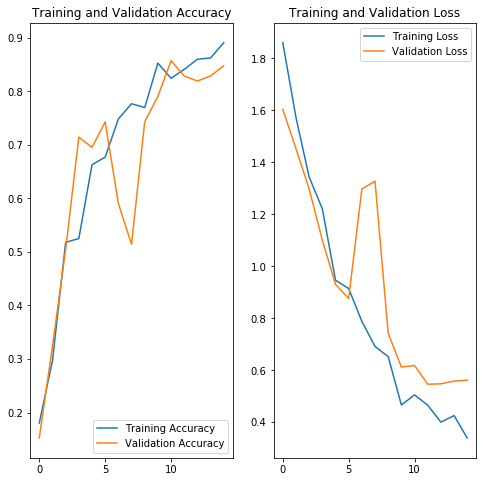

In [179]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [180]:
# Metodo para devolver o caminho completo das imagens
def getListCaminho(dir):
    list = []
    for pastaAtual, subPastas, arquivos in os.walk(dir):
        for item in arquivos:
            list.append(item)
    return list

In [184]:
# Lêr o diretorio 
files = getListCaminho("analise/dadosIdentidade/") 

# Lê todos aos arquivos do diretotio 
for file in files:
    sunflower_path = "analise/dadosIdentidade/"+file

    img = keras.preprocessing.image.load_img(sunflower_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("Imagem {} classsificada como {} com {:.2f} de probabilidade"
          .format(file, class_names[np.argmax(score)], 100 * np.max(score)))

Imagem c_1.jpg classsificada como Identidade_dados com 100.00 de probabilidade
Imagem c_2.jpg classsificada como Identidade_dados com 100.00 de probabilidade
Imagem c_3.jpg classsificada como Identidade_dados com 100.00 de probabilidade
Imagem c_4.jpg classsificada como Identidade_dados com 100.00 de probabilidade
Imagem c_5.jpg classsificada como Identidade_dados com 100.00 de probabilidade
Imagem dadosIdentidade.jpg classsificada como Identidade_dados com 99.55 de probabilidade


This image most likely belongs to cnh with a 87.39 percent confidence.
